# **Student Performance Prediction using Regression Models**

## **Overview**
This notebook explores various regression techniques to predict student exam scores based on a comprehensive dataset of influencing factors. The process involves data loading, cleaning, exploratory data analysis, feature engineering, model training, hyperparameter tuning, and evaluation.

## Notebook Structure

*   [**Imports and Lab Setup**](#imports-and-lab-setup): Imports necessary libraries and sets up the environment.
*   [**Load Dataset**](#load-dataset-from-google-drive): Loads the student performance data.
*   [**Data Cleaning and Splitting**](#data-cleaning-and-splitting): Cleans the dataset and splits it into training, cross-validation, and testing sets.
*   [**Visualizing Hours Studied vs Exam Score**](#visualizing-hours-studied-vs-exam-score): Visualizes the relationship between hours studied and exam scores.
*   [**Feature-Target Visualization**](#feature-target-visualization): Visualizes the relationship between each feature and the target variable.
*   [**Visual Correlation Analysis for Imputation**](#visual-correlation-analysis-for-imputation): Explores correlations for data imputation.
*   [**Encode Categorical Features**](#encode-categorical-features): Converts categorical features into numerical format.
*   [**Polynomial Regression Tuning**](#polynomial-regression-tuning): Tunes polynomial regression models.
*   [**Regularization Parameter Tuning**](#regularization-parameter-tuning): Tunes Ridge regression models with regularization.
*   [**Model Evaluation with Ridge and Linear Regression**](#model-evaluation-with-ridge-and-linear-regression): Compares Ridge and Linear Regression models.
*   [**Automated Hyperparameter Tuning with GridSearchCV**](#automated-hyperparameter-tuning-with-gridsearchcv): Uses GridSearchCV for hyperparameter tuning.
*   [**Helper Functions**](#helper-functions-for-modeling-and-visualization): Contains reusable functions for the analysis.

## **Imports and Lab Setup**
This cell loads core libraries for data manipulation (pandas, numpy), visualization (matplotlib, seaborn), and modeling (scikit-learn). It also mounts Google Drive to access external files. Most of the modeling will use linear regressors and preprocessing tools already familiar from previous labs.


In [ ]:
import sys
import os


from google.colab import drive
drive.mount('/content/drive')

# Replace '/path/to/your/utils_folder' with the actual path to your folder in Google Drive
utils_folder_path = '/content/drive/My Drive/Machine Learning/'

# Add the folder to the Python path
if os.path.exists(utils_folder_path):
    sys.path.append(utils_folder_path)
    print(f"Added {utils_folder_path} to Python path.")
else:
    print(f"Error: Folder not found at {utils_folder_path}. Please check the path.")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Added /content/drive/My Drive/Machine Learning/ to Python path.


In [ ]:
# Import Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from utils import *


from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error

from sklearn import preprocessing
le = preprocessing.LabelEncoder()


# from google.colab import drive
# drive.mount('/content/drive')

##**Load Dataset from Google Drive**
This cell loads the student performance dataset from Google Drive into a pandas DataFrame and displays its column names for inspection.


In [ ]:
# Corrected file path after mounting Google Drive
students_file_path = '/content/drive/MyDrive/Machine Learning/StudentPerformanceFactors.csv'
train_data = pd.read_csv(students_file_path)
train_data.columns


Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [ ]:
train_data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


##



## **Data Cleaning and Splitting**
This cell cleans the dataset using a custom clean() function, then splits it into training, cross-validation, and test sets to prepare for model evaluation. It prints the shape of each split for verification


In [ ]:
# Clean Data
X, y = clean(train_data)

# Split Data
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.3, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.5, random_state=42)

print("X_train Shape: " + str(X_train.shape))
print("X_CV Shape: " + str(X_cv.shape))
print("X_test Shape: " + str(X_test.shape))


X_train Shape: (4624, 19)
X_CV Shape: (991, 19)
X_test Shape: (992, 19)


# **Visualizing Hours Studied vs Exam Score**
This cell plots a linear regression line showing how hours studied correlates with exam score. It uses the trained linear model and scaled input to highlight the strength and direction of the relationship.


Slope (Coefficient): 1.707582650158232
Intercept: 67.23680795847751

R^2 Score: 0.18535735136112363


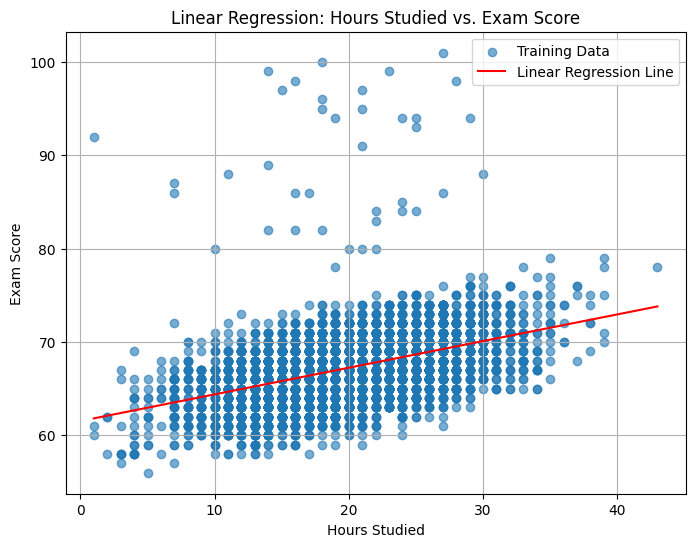

In [ ]:
hours_studied = X_train['Hours_Studied'].values.reshape(-1, 1)

scaler = StandardScaler()
hours_studied_scaled = scaler.fit_transform(hours_studied)

linear_model = LinearRegression()
linear_model.fit(hours_studied_scaled, y_train)

print(f"Slope (Coefficient): {linear_model.coef_[0]}")
print(f"Intercept: {linear_model.intercept_}\n")

print(f"R^2 Score: {linear_model.score(hours_studied_scaled, y_train)}")

plot_hours_studied_vs_exam_score_linear_fit(X_train, y_train)

##
# **Feature-Target Visualization**
This cell visualizes the relationship between each feature and the target variable. Numeric features are scaled and plotted as scatter plots, while categorical features are shown using boxplots to highlight distribution patterns and potential predictive value.


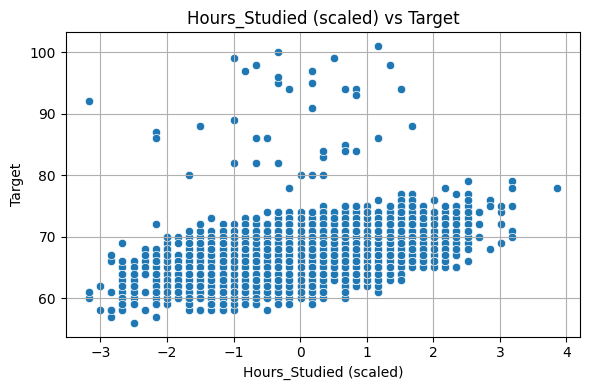

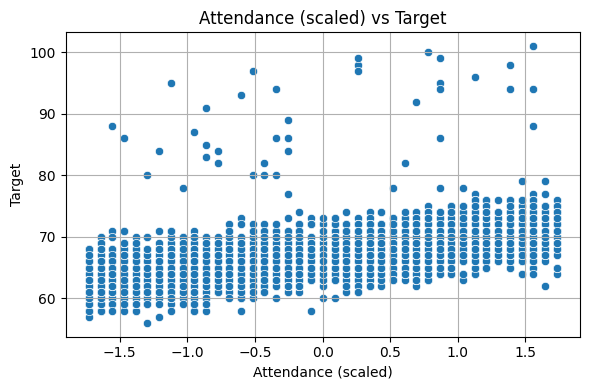

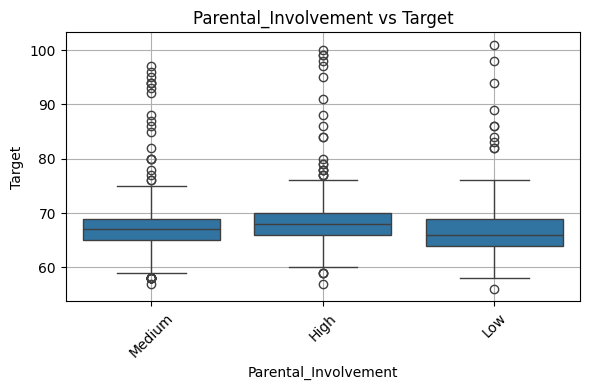

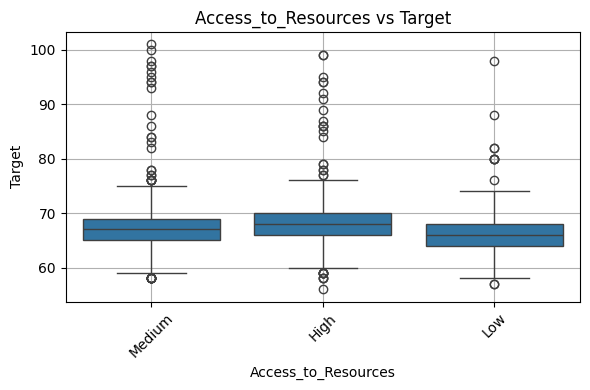

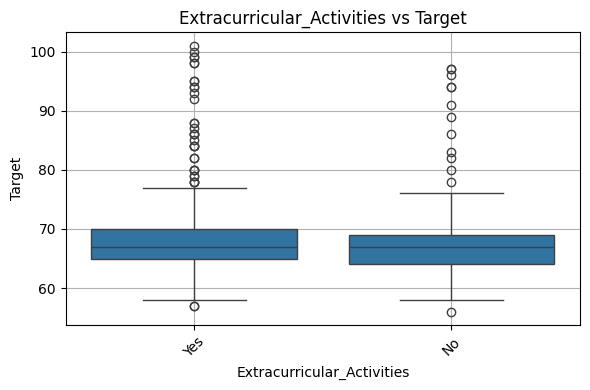

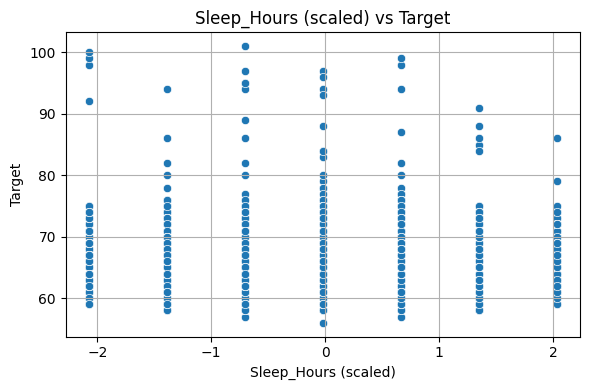

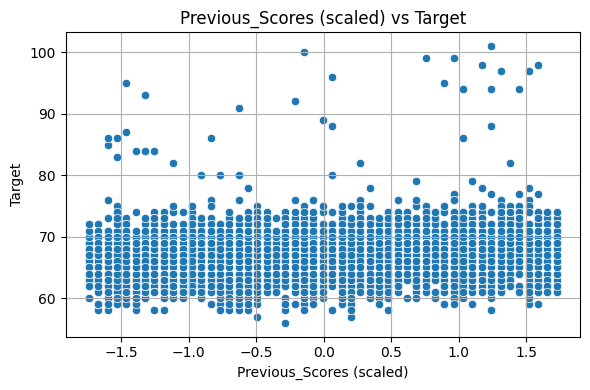

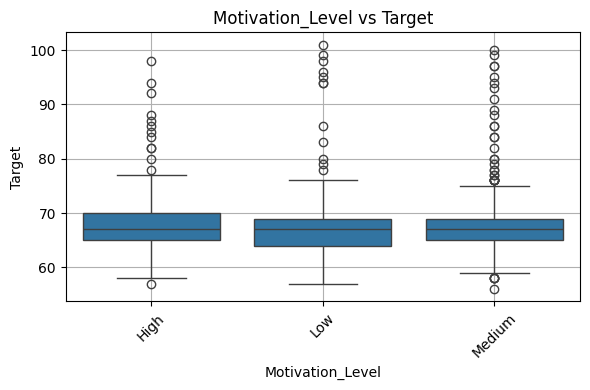

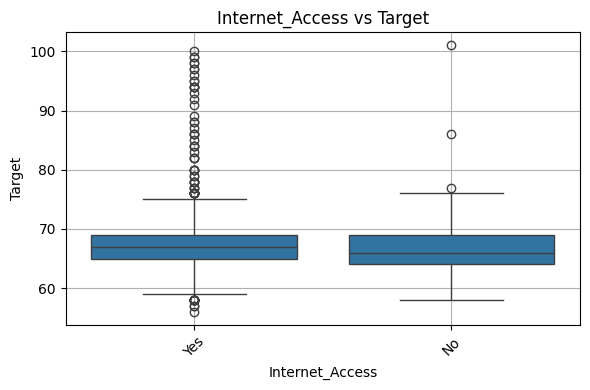

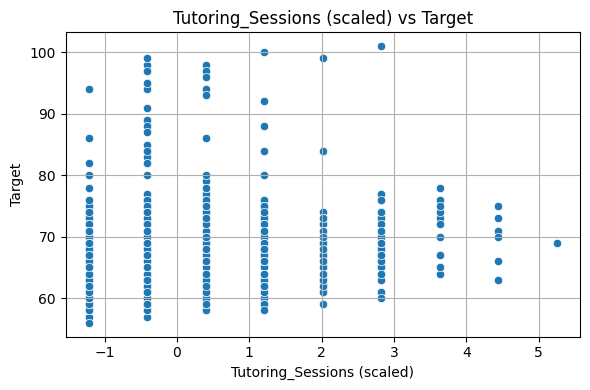

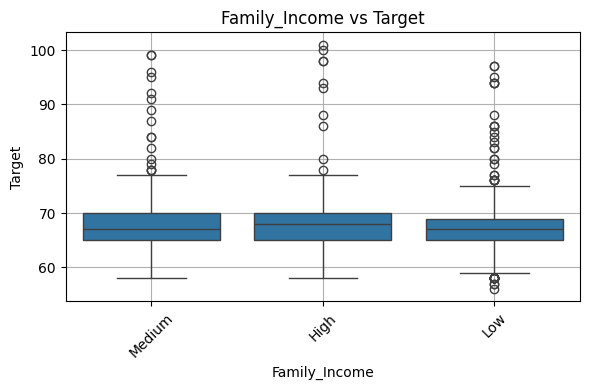

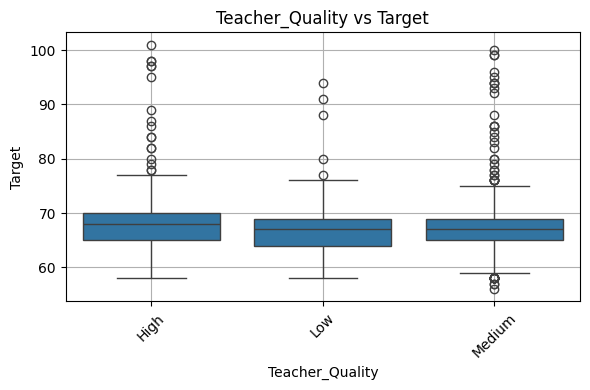

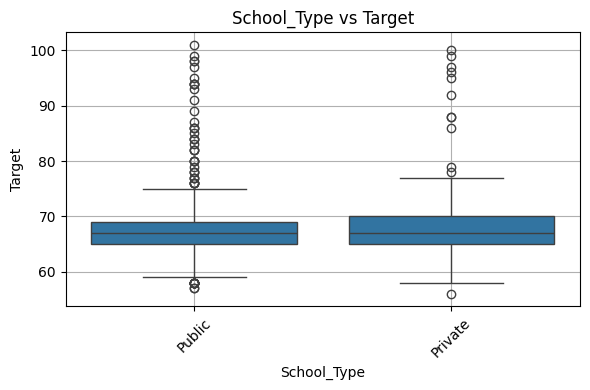

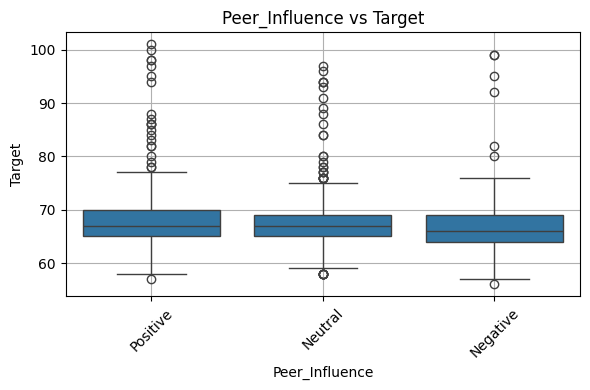

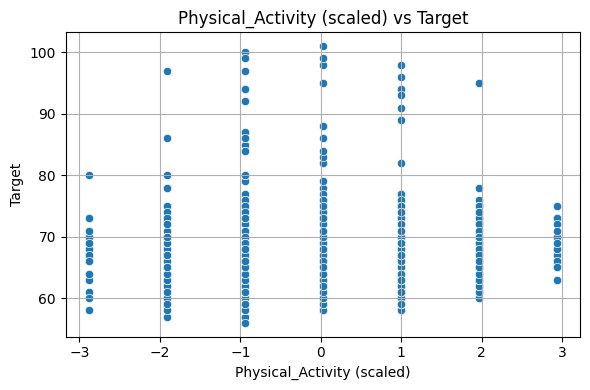

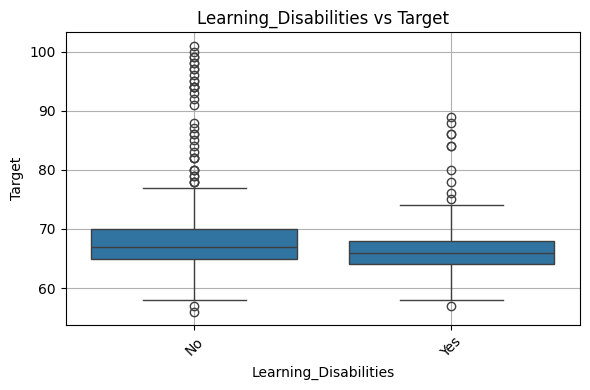

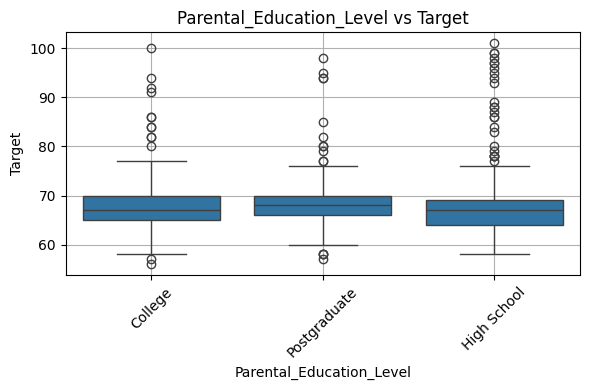

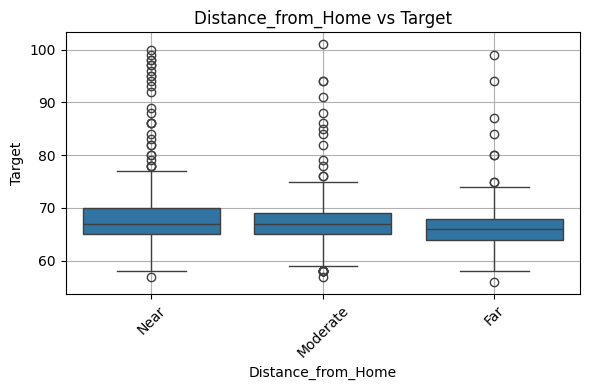

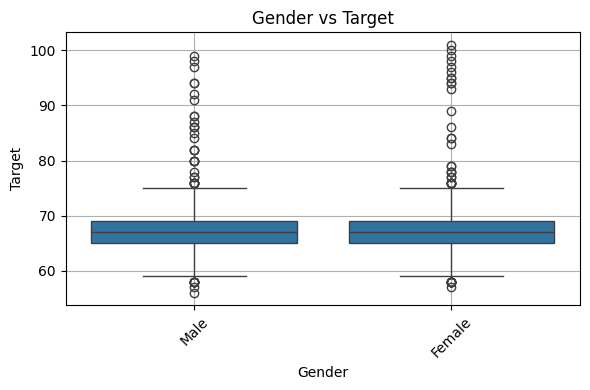

In [ ]:
# Visualize data
for col in X_train.columns:
    plt.figure(figsize=(6, 4))

    # Check if feature is numeric
    if X_train[col].dtype in ['int64', 'float64']:
        # Scale numeric feature *only for plotting*
        scaler = StandardScaler()
        # Use the original column for fitting and transforming
        scaled_feature = scaler.fit_transform(X_train[[col]])

        # Plot scatter using the scaled feature
        sns.scatterplot(x=scaled_feature.flatten(), y=y_train)
        plt.title(f"{col} (scaled) vs Target")
        plt.xlabel(f"{col} (scaled)")
        plt.ylabel("Target")

    else:
        # Plot boxplot for categorical feature (no scaling)
        sns.boxplot(x=X_train[col], y=y_train)
        plt.title(f"{col} vs Target")
        plt.xlabel(col)
        plt.ylabel("Target")
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.grid(True)
    plt.show()

#
# **Visual Correlation Analysis for Imputation**
This cell explores how the categorical feature Distance_from_Home relates to all other features using boxplots. It helps identify which variables are most correlated and suitable for group-based imputation during data cleaning.


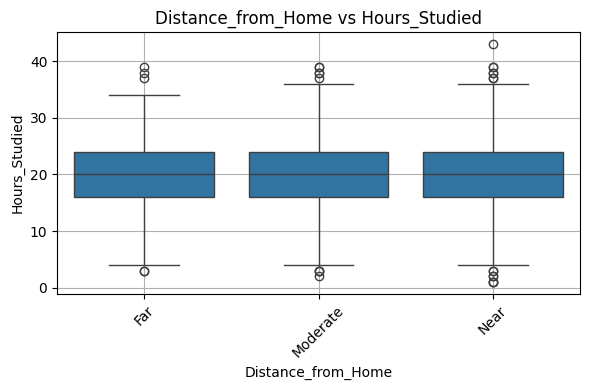

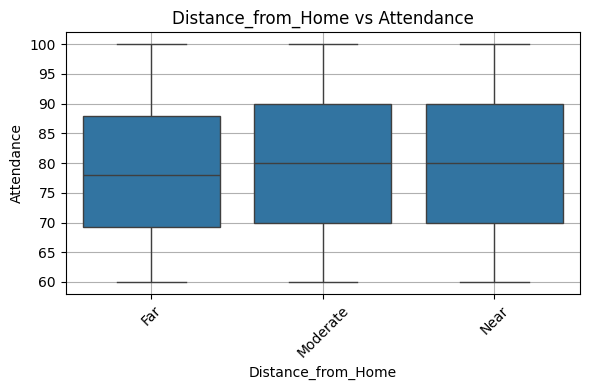

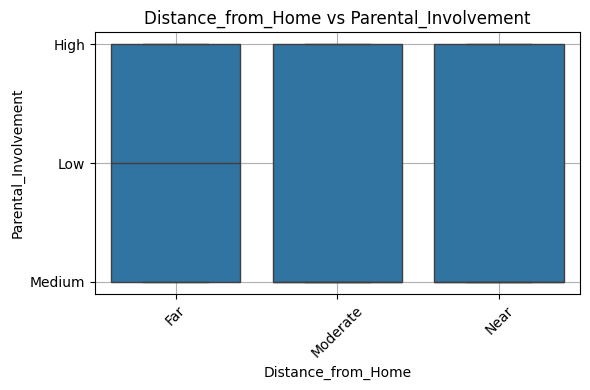

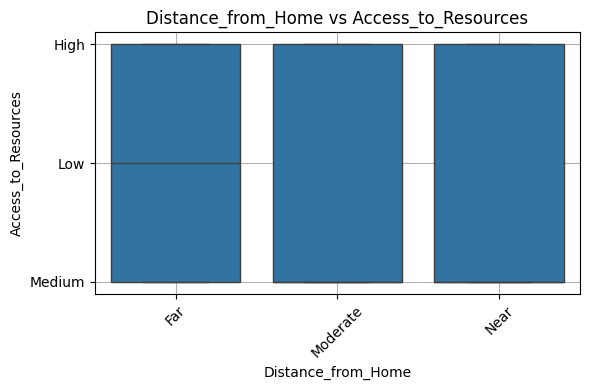

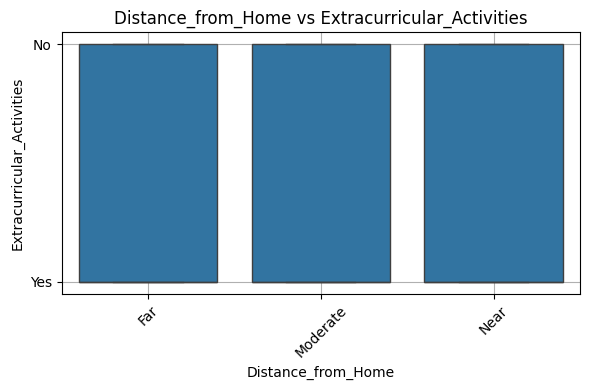

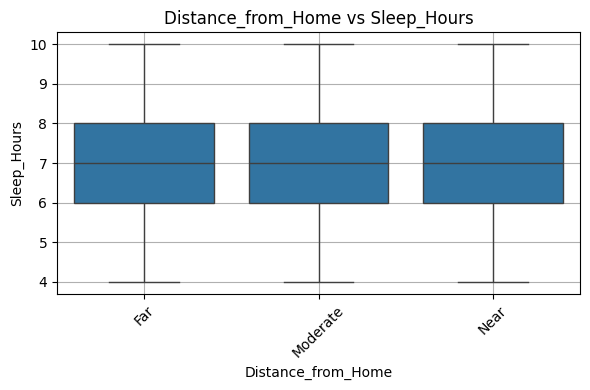

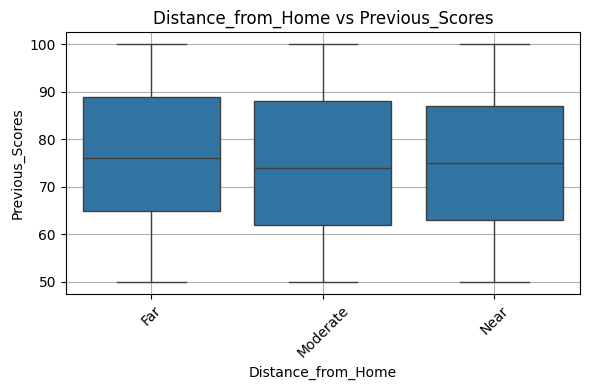

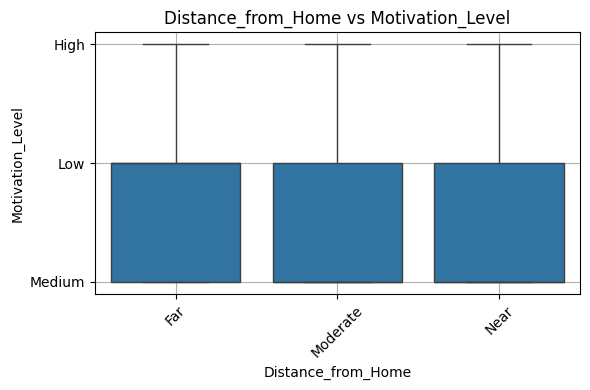

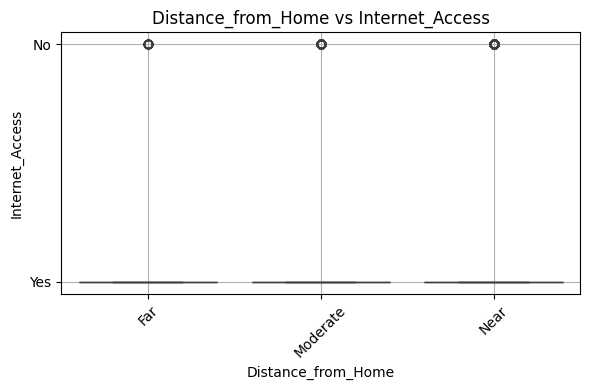

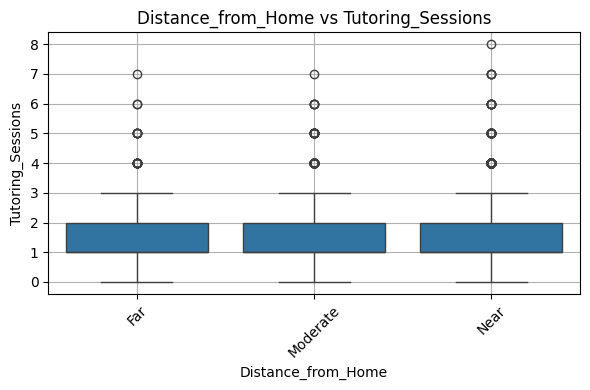

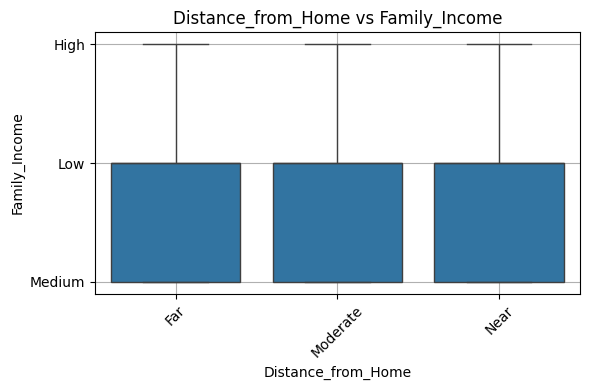

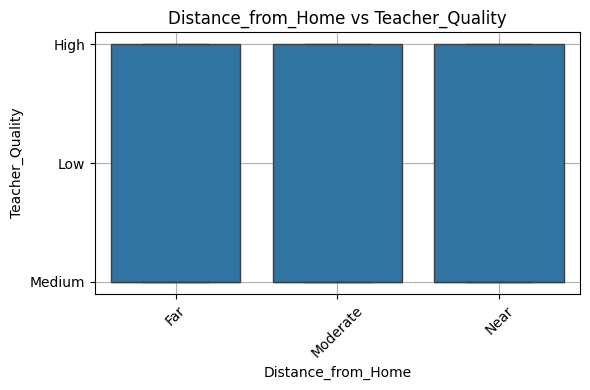

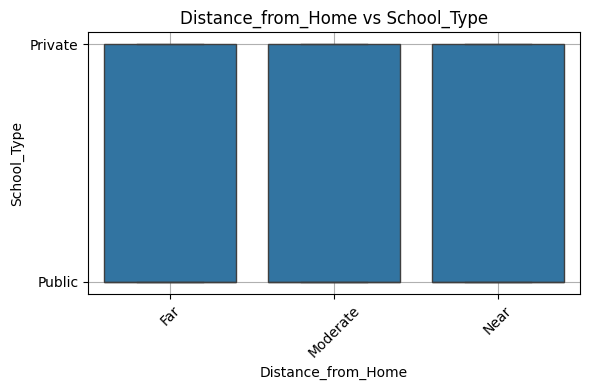

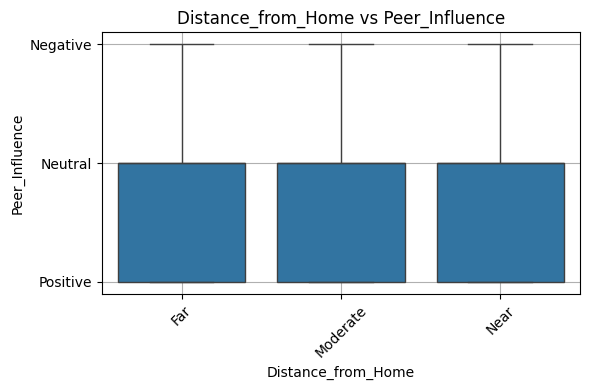

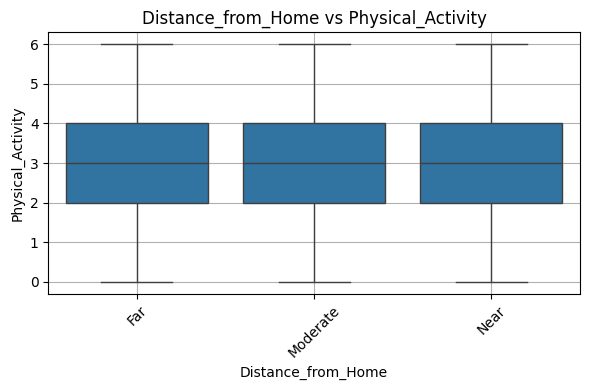

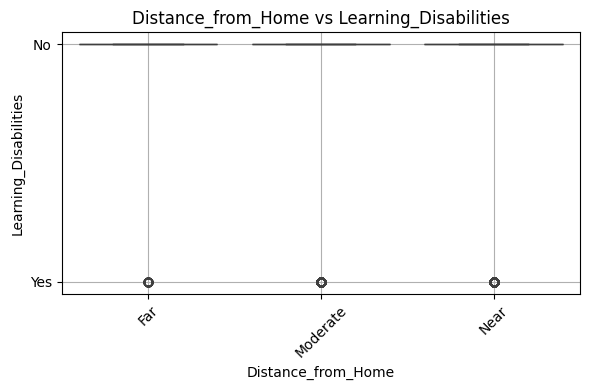

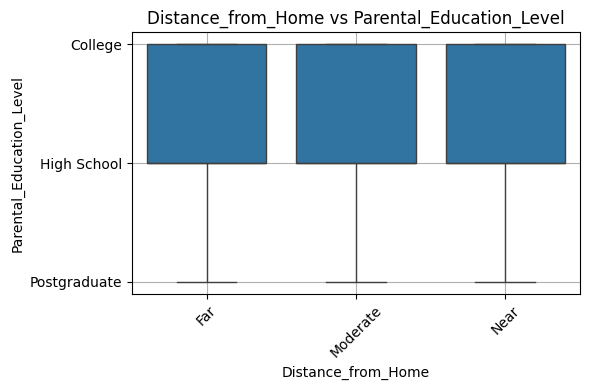

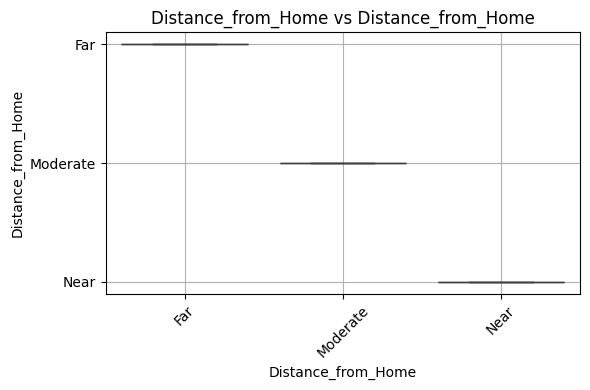

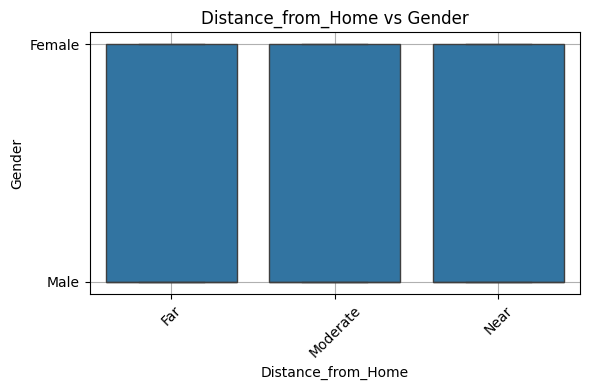

In [ ]:
# Find Correlation of certain columns for cleaning
# select_cols =  ['Distance_from_Home', 'Parental_Education_Level', 'Teacher_Quality']
select_cols =  ['Distance_from_Home']
for sel_col in select_cols:
  # Ensure the column from select_cols is treated as categorical
  X_train[sel_col] = X_train[sel_col].astype('category')
  X_cv[sel_col] = X_cv[sel_col].astype('category')
  X_test[sel_col] = X_test[sel_col].astype('category')


  for col in X_train.columns:
    plt.figure(figsize=(6, 4))

    # Plot boxplot for categorical feature (no scaling)
    # Ensure the y-axis data is numerical
    if X_train[col].dtype in ['int64', 'float64']:
        sns.boxplot(x=X_train[sel_col], y=X_train[col], data=X_train)
        plt.title(f"{sel_col} vs {col}")
        plt.xlabel(sel_col)
        plt.ylabel(col)
        plt.xticks(rotation=45)
    else:
        # Handle cases where the other column is also categorical (after encoding)
        # A boxplot might not be the best visualization here, but we'll attempt it.
        # Seaborn might be able to handle two categorical variables with a boxplot
        # if they are properly typed as category.
        sns.boxplot(x=X_train[sel_col], y=X_train[col].astype('category'), data=X_train)
        plt.title(f"{sel_col} vs {col}")
        plt.xlabel(sel_col)
        plt.ylabel(col)
        plt.xticks(rotation=45)


    plt.tight_layout()
    plt.grid(True)
    plt.show()

#
# **Encode Categorical Features**
This cell identifies object-type columns and applies label encoding to convert them into numeric format for modeling. It prints the class labels for each encoded feature.


In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Define feature groups
ordinal_features = [
    'Parental_Involvement', 'Access_to_Resources', 'Motivation_Level',
    'Family_Income', 'Teacher_Quality', 'Peer_Influence',
    'Parental_Education_Level', 'Distance_from_Home'
]

nominal_features = ['Gender', 'School_Type']
binary_features = ['Extracurricular_Activities', 'Internet_Access', 'Learning_Disabilities']

# Identify numeric features
categorical = ordinal_features + nominal_features + binary_features
numeric_features = [col for col in X_train.columns if col not in categorical]

# Column transformer (no scaling for numeric)
preprocessor = ColumnTransformer(transformers=[
    ('ord', OrdinalEncoder(), ordinal_features),
    ('nom', OneHotEncoder(drop='first'), nominal_features),
    ('bin', OrdinalEncoder(), binary_features),
    ('num', 'passthrough', numeric_features)
])


In [ ]:
# Fit encoder on training data
preprocessor.fit(X_train)

# Transform all splits
X_train_encoded = preprocessor.transform(X_train)
X_cv_encoded = preprocessor.transform(X_cv)
X_test_encoded = preprocessor.transform(X_test)

# Get feature names
ord_names = ordinal_features
nom_names = preprocessor.named_transformers_['nom'].get_feature_names_out(nominal_features)
bin_names = binary_features
num_names = numeric_features

all_feature_names = list(ord_names) + list(nom_names) + list(bin_names) + list(num_names)

# Convert to DataFrames
X_train = pd.DataFrame(X_train_encoded, columns=all_feature_names, index=X_train.index)
X_cv = pd.DataFrame(X_cv_encoded, columns=all_feature_names, index=X_cv.index)
X_test = pd.DataFrame(X_test_encoded, columns=all_feature_names, index=X_test.index)

In [ ]:
X_cv.head()

,Parental_Involvement,Access_to_Resources,Motivation_Level,Family_Income,Teacher_Quality,Peer_Influence,Parental_Education_Level,Distance_from_Home,Gender_Male,School_Type_Public,Extracurricular_Activities,Internet_Access,Learning_Disabilities,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity
2516,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,21.0,79.0,7.0,84.0,2.0,3.0
3749,0.0,1.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,11.0,94.0,10.0,61.0,1.0,3.0
4104,2.0,2.0,2.0,0.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,20.0,63.0,8.0,61.0,2.0,3.0
1192,0.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,16.0,66.0,7.0,79.0,0.0,3.0
3377,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,14.0,62.0,9.0,73.0,1.0,6.0


##


# **Polynomial Regression Tuning**
This cell trains polynomial regression models of degrees 1 to 10, applying feature scaling and tracking training and cross-validation errors. It stores each model and transformation for later use, then plots MSEs to visualize overfitting and select the optimal degree.


Degree 1: Train MSE = 5.7028, CV MSE = 3.6886
Degree 2: Train MSE = 4.3903, CV MSE = 2.9005
Degree 3: Train MSE = 2.9586, CV MSE = 5.8801
Degree 4: Train MSE = 0.0000, CV MSE = 77.5417


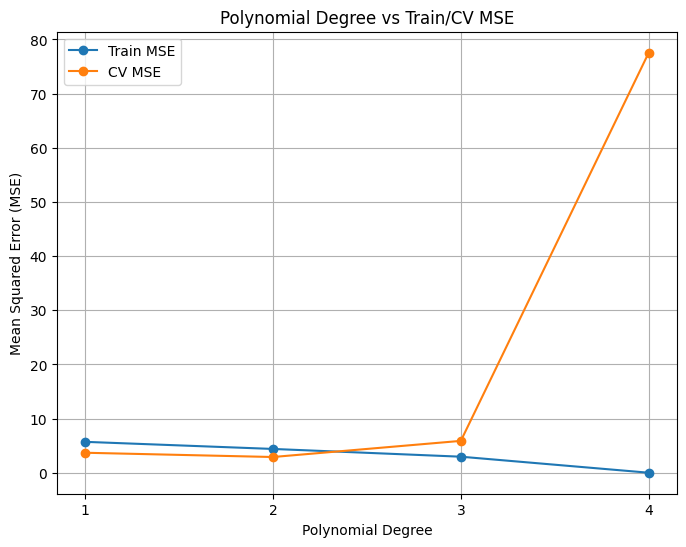

In [ ]:
# Initialize lists to store results
train_mses = []
cv_mses = []
models = []
polys = []
scalers = []

# Loop over polynomial degrees from 1 to 10
for degree in range(1, 5):
    # Polynomial feature transformation
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_mapped = poly.fit_transform(X_train)
    X_cv_mapped = poly.transform(X_cv)
    polys.append(poly)

    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_mapped)
    X_cv_scaled = scaler.transform(X_cv_mapped)
    scalers.append(scaler)

    # Model training
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    models.append(model)

    # Predictions and MSEs
    yhat_train = model.predict(X_train_scaled)
    yhat_cv = model.predict(X_cv_scaled)

    train_mse = mean_squared_error(y_train, yhat_train)
    cv_mse = mean_squared_error(y_cv, yhat_cv)

    train_mses.append(train_mse)
    cv_mses.append(cv_mse)

    # Optional: print progress
    print(f"Degree {degree}: Train MSE = {train_mse:.4f}, CV MSE = {cv_mse:.4f}")

# Plotting results
degrees = range(1, 5)
plot_train_cv_mses(degrees, train_mses, cv_mses, title="Polynomial Degree vs Train/CV MSE")



##  
  
# **Regularization Parameter Tuning**  
This cell trains Ridge regression models with polynomial degree 1 across various regularization strengths (`lambda` values). It plots training and cross-validation errors to help identify the best regularization level for reducing overfitting.




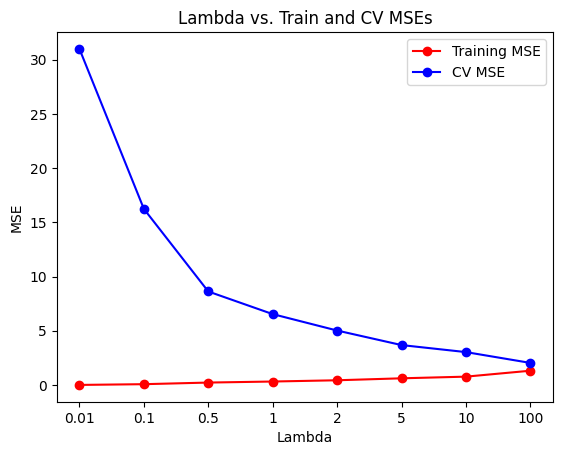

In [ ]:
# Define lambdas to plot
reg_params = [0.01,0.1, 0.5, 1, 2, 5, 10, 100]

# Define degree of polynomial and train for each value of lambda
train_plot_reg_params(reg_params, X_train_scaled, y_train, X_cv_scaled, y_cv, degree= 2)

#
# **Model Evaluation with Ridge and Linear Regression**
This cell trains a Ridge regression model with polynomial degree 2 and a specified regularization strength (lambda). It compares its performance to a baseline linear regression model using scaled original features, printing scores for training, cross-validation, and test sets.


In [ ]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import StandardScaler

# Set polynomial degree and regularization strength
degree = 2
lambda_value = 5  # 👈 Adjust this to tune regularization

# Retrieve corresponding polynomial transformer and scaler
poly = polys[degree - 1]
scaler = scalers[degree - 1]

# Transform features to polynomial space
X_train_poly = poly.fit_transform(X_train)
X_cv_poly = poly.transform(X_cv)
X_test_poly = poly.transform(X_test)

# Scale transformed features
X_train_scaled = scaler.fit_transform(X_train_poly)
X_cv_scaled = scaler.transform(X_cv_poly)
X_test_scaled = scaler.transform(X_test_poly)

# Train Ridge regression model
ridge_model = Ridge(alpha=lambda_value)
ridge_model.fit(X_train_scaled, y_train)

# Train baseline Linear Regression on original features
linear_scaler = StandardScaler()
X_train_lin = linear_scaler.fit_transform(X_train)
X_cv_lin = linear_scaler.transform(X_cv)
X_test_lin = linear_scaler.transform(X_test)

linear_model = LinearRegression()
linear_model.fit(X_train_lin, y_train)

# Evaluate both models
print(f"Ridge Regression (Degree {degree}, λ={lambda_value})")
print(f"Train Score: {ridge_model.score(X_train_scaled, y_train):.4f}")
print(f"CV Score:    {ridge_model.score(X_cv_scaled, y_cv):.4f}")
print(f"Test Score:  {ridge_model.score(X_test_scaled, y_test):.4f}\n")

print("Baseline Linear Regression")
print(f"Train Score: {linear_model.score(X_train_lin, y_train):.4f}")
print(f"CV Score:    {linear_model.score(X_cv_lin, y_cv):.4f}")
print(f"Test Score:  {linear_model.score(X_test_lin, y_test):.4f}")

Ridge Regression (Degree 2, λ=5)
Train Score: 0.7204
CV Score:    0.7703
Test Score:  0.7517

Baseline Linear Regression
Train Score: 0.6375
CV Score:    0.7036
Test Score:  0.6760


#
# **Automated Hyperparameter Tuning with GridSearchCV**
This cell builds a pipeline combining polynomial feature expansion, scaling, and Ridge regression. It uses GridSearchCV to search over multiple polynomial degrees and regularization strengths, applying 5-fold cross-validation to find the best combination based on R² score. Categorical features are label-encoded before fitting.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder # Import LabelEncoder
from sklearn.linear_model import Ridge
import pandas as pd
import numpy as np

# Use the clean function to get X and y
# Ensure to use the latest clean function
X_cleaned, y_cleaned = clean(train_data.copy())

# Identify categorical columns (object or category dtype) for encoding
categorical_cols = X_cleaned.select_dtypes(include=['object', 'category']).columns

# Apply Label Encoding to the full cleaned dataset before splitting for grid search
# Fit encoder on the full dataset to handle all possible categories
le = LabelEncoder()
for col in categorical_cols:
    X_cleaned[col] = le.fit_transform(X_cleaned[col])


# Define the pipeline steps: Polynomial Features, Scaling, and Ridge Regression
pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Define the grid of hyperparameters to search
param_grid = {
    'poly__degree': range(1, 4),  # Search polynomial degrees from 1 to 3
    'ridge__alpha': [0.01,0.1, 0.5, 1, 2, 5, 10, 100] # Search different lambda values for Ridge
}

# Set up GridSearchCV with cross-validation
# Using R^2 as the scoring metric, which is the default for Ridge.
# cv=5 means 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2') # Using R^2 as the scoring metric

# Fit the grid search to the data
grid_search.fit(X_cleaned, y_cleaned)

# Print the best hyperparameters and the best score
print("Best hyperparameters found:")
print(grid_search.best_params_)
print("\nBest R^2 score from cross-validation:")
print(grid_search.best_score_)

Best hyperparameters found:
{'poly__degree': 2, 'ridge__alpha': 5}

Best R^2 score from cross-validation:
0.7124048538178173


# **Helper Functions for Modeling and Visualization**
This block defines reusable functions for plotting training vs. cross-validation errors across polynomial degrees and regularization strengths, cleaning categorical features using group-based imputation, and visualizing the linear relationship between hours studied and exam score. These utilities streamline analysis and model tuning throughout the notebook.


In [ ]:
def plot_train_cv_mses(degrees, train_mses, cv_mses, title):
    """
    Plots the training and cross-validation MSEs vs polynomial degree.

    Args:
        degrees (list): List of polynomial degrees.
        train_mses (list): List of training mean squared errors.
        cv_mses (list): List of cross-validation mean squared errors.
        title (str): Title of the plot.
    """
    plt.figure(figsize=(8, 6))
    plt.plot(degrees, train_mses, marker='o', linestyle='-', label='Train MSE')
    plt.plot(degrees, cv_mses, marker='o', linestyle='-', label='CV MSE')
    plt.title(title)
    plt.xlabel("Polynomial Degree")
    plt.ylabel("Mean Squared Error (MSE)")
    plt.xticks(degrees)
    plt.legend()
    plt.grid(True)
    plt.show()

def clean(data):
    # Separate target
    y = data["Exam_Score"]
    # Keep all other columns as features
    X = data.drop("Exam_Score", axis=1, errors='ignore')

    # Define imputation rules for the target categorical columns using their correlated features
    imputation_map = {
        'Parental_Education_Level': ['Previous_Scores', 'Attendance','Parental_Involvement','Access_to_Resources'],
        'Teacher_Quality': ['Previous_Scores', 'Access_to_Resources'],
        'Distance_from_Home': ['Parental_Involvement', 'Access_to_Resources', 'Attendance']
    }

    # Impute each target categorical column using its correlated features (group mode)
    for target_col, group_cols in imputation_map.items():
        if target_col in X.columns: # Check in X DataFrame
            # Ensure grouping columns exist before grouping
            existing_group_cols = [col for col in group_cols if col in X.columns] # Check in X DataFrame
            if existing_group_cols:
                 # Calculate the overall mode for fallback
                 overall_mode = X[target_col].mode()[0] if not X[target_col].mode().empty else 'Unknown'
                 X[target_col] = X.groupby(existing_group_cols)[target_col].transform(
                    # Use mode for categorical imputation, fallback to overall mode if group mode is empty
                    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else overall_mode)
                 )

    # Do not handle any remaining NaNs in other columns as per user request

    return X, y

def clean_hours_only(data):
    # Drop irrelevant columns
    y = data["Exam_Score"]
    data = data.drop("Exam_Score", axis=1, errors='ignore')

    # Features to be dropped (consider if you still want to drop these)
    # Removed the extra comma at the end
    dropped = ['Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender'
       ]
    data = data.drop(dropped, axis=1, errors='ignore')


    # Fill missing values for specified columns before encoding
    # cols_to_fill = ["Parental_Education_Level", "Distance_from_Home", "Teacher_Quality"]
    # for col in cols_to_fill:
    #     if col in data.columns:
    #         # For categorical columns, fill with mode or a placeholder
    #         if data[col].dtype == 'object':
    #              data[col] = data[col].fillna(data[col].mode()[0])
    #         # For numeric columns, fill with median
    #         else:
    #              data[col] = data[col].fillna(data[col].median())


    return data, y


def train_plot_reg_params(reg_params, x_train, y_train, x_cv, y_cv, degree= 1, baseline=None):

    train_mses = []
    cv_mses = []
    models = []

    # Loop over 10 times. Each adding one more degree of polynomial higher than the last.
    for reg_param in reg_params:

        # Create and train the model
        model = Ridge(alpha=reg_param)
        model.fit(x_train, y_train) # Use the already scaled and mapped training data
        models.append(model)

        # Compute the training MSE
        yhat = model.predict(x_train) # Use the already scaled and mapped training data
        train_mse = mean_squared_error(y_train, yhat) / 2
        train_mses.append(train_mse)

        # Compute the cross-validation MSE
        yhat = model.predict(x_cv) # Use the already scaled and mapped CV data
        cv_mse = mean_squared_error(y_cv, yhat) / 2
        cv_mses.append(cv_mse)

    # Plot the results
    reg_params = [str(x) for x in reg_params]
    plt.plot(reg_params, train_mses, marker='o', c='r', label='training MSEs');
    plt.plot(reg_params, cv_mses, marker='o', c='b', label='CV MSEs');
    plt.plot(reg_params, np.repeat(baseline, len(reg_params)), linestyle='--', label='baseline')
    plt.title("lambda vs. train and CV MSEs")
    plt.xlabel("lambda");
    plt.ylabel("MSE");
    plt.legend()
    plt.show()


def plot_hours_studied_vs_exam_score_linear_fit(X_train, y_train):
    """
    Plots a scatter plot of 'Hours_Studied' vs 'Exam_Score' with a linear regression line.

    Args:
        X_train (pd.DataFrame): Training features DataFrame.
        y_train (pd.Series): Training target Series.
    """
    # Select the 'Hours_Studied' column from the training data
    hours_studied_train = X_train['Hours_Studied']

    # Reshape the data for the scaler and model (needs to be 2D)
    hours_studied_train_reshaped = hours_studied_train.values.reshape(-1, 1)

    # Fit a scaler specifically for 'Hours_Studied' using the training data
    scaler_hours = StandardScaler()
    hours_studied_train_scaled = scaler_hours.fit_transform(hours_studied_train_reshaped)

    # Train a simple Linear Regression model specifically on 'Hours_Studied'
    simple_linear_model = LinearRegression()
    simple_linear_model.fit(hours_studied_train_scaled, y_train)

    # Generate a range of 'Hours_Studied' values for plotting the regression line
    # Use the min and max of the original hours_studied_train for the range
    x_plot = np.linspace(hours_studied_train.min(), hours_studied_train.max(), 100).reshape(-1, 1)

    # Scale the generated hours values using the fitted scaler
    x_plot_scaled = scaler_hours.transform(x_plot)

    # Predict the corresponding exam scores using the simple linear model
    y_plot = simple_linear_model.predict(x_plot_scaled)

    # Create the scatter plot of original data
    plt.figure(figsize=(8, 6))
    plt.scatter(hours_studied_train, y_train, label='Training Data', alpha=0.6)

    # Plot the linear regression line
    plt.plot(x_plot, y_plot, color='red', label='Linear Regression Line')

    plt.title("Linear Regression Model on Hours Studied vs. Exam Score")
    plt.xlabel("Hours Studied")
    plt.ylabel("Exam Score")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example of how to call the function after defining it:
# plot_hours_studied_vs_exam_score_linear_fit(X_train, y_train)